# Introductions (5 min)

# First notebook (40 min to walkthrough)
## Basic visualization walkthrough 

# Second Notebook (15 min to run advanced notebook)

## Already made notebook to show potential of advanced visualizations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
df_owid = pd.read_csv('https://raw.githubusercontent.com/sghsri/covid-19-data/main/owid-covid-latest.csv')
df_pop = pd.read_csv('https://raw.githubusercontent.com/sghsri/covid-19-data/main/population_by_country_2020.csv')
df_hos = pd.read_csv('https://raw.githubusercontent.com/sghsri/covid-19-data/main/covid-hospitalizations.csv')

In [3]:
df_owid

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2022-04-01,177782.0,35.0,65.857,7670.0,0.0,1.857,...,NaN,NaN,37.746,0.500,64.83,0.511,NaN,NaN,NaN,NaN
1,OWID_AFR,NaN,Africa,2022-04-01,11559547.0,612.0,9556.286,251961.0,8.0,63.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2022-04-01,273759.0,82.0,63.000,3492.0,0.0,0.286,...,7.100,51.200,NaN,2.890,78.57,0.795,NaN,NaN,NaN,NaN
3,DZA,Africa,Algeria,2022-04-01,265679.0,8.0,9.571,6874.0,0.0,0.143,...,0.700,30.400,83.741,1.900,76.88,0.748,NaN,NaN,NaN,NaN
4,AND,Europe,Andorra,2022-04-01,40024.0,311.0,44.429,153.0,0.0,0.000,...,29.000,37.800,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,WLF,Oceania,Wallis and Futuna,2022-04-01,454.0,0.0,0.000,7.0,0.0,0.000,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
229,OWID_WRL,NaN,World,2022-04-01,489608730.0,1170974.0,1449590.429,6148594.0,5460.0,4228.286,...,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
230,YEM,Asia,Yemen,2022-04-01,11806.0,0.0,0.429,2143.0,0.0,0.143,...,7.600,29.200,49.542,0.700,66.12,0.470,NaN,NaN,NaN,NaN
231,ZMB,Africa,Zambia,2022-04-01,316941.0,91.0,74.143,3966.0,0.0,0.000,...,3.100,24.700,13.938,2.000,63.89,0.584,NaN,NaN,NaN,NaN


In [4]:
df_pop

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [5]:
n_countries = 10
countries = df_owid.location[:n_countries].to_numpy()
total_cases = df_owid.total_cases[:n_countries].to_numpy()

In [6]:
idxs = np.argsort(np.array(total_cases))
countries = countries[idxs]
total_cases = total_cases[idxs]

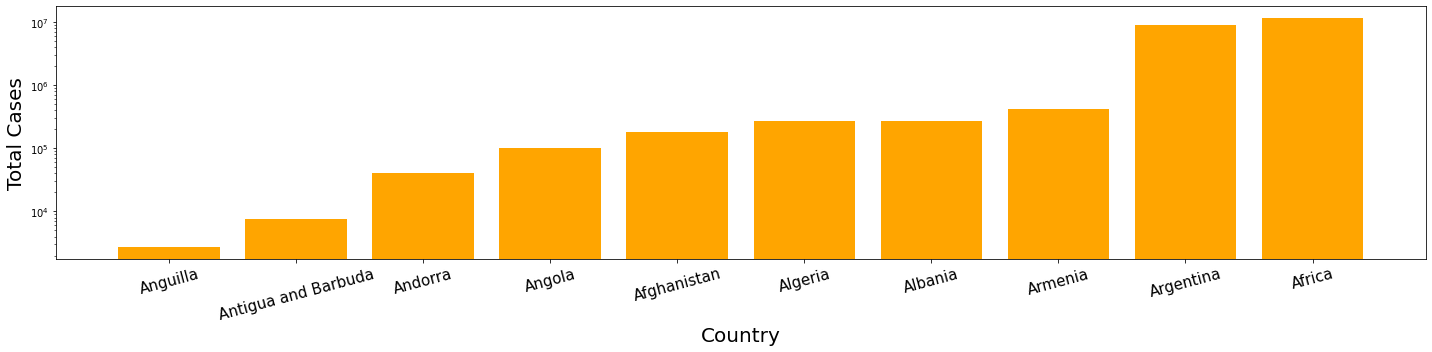

In [7]:
plt.figure(figsize=(20, 5))
x = np.arange(len(total_cases))
plt.bar(x=x, height=total_cases, color='orange')
plt.xticks(ticks=x, labels=list(countries), fontsize=15)
plt.xticks(rotation=15)
plt.yscale('log')
plt.xlabel('Country', fontsize=20)
plt.ylabel('Total Cases', fontsize=20)

plt.tight_layout()
plt.show()


In [8]:
a = df_hos
a = a[a.indicator=='Daily ICU occupancy']
a = a[a.entity=='United States']
dates = a.date.to_numpy()
values = a.value.to_numpy()

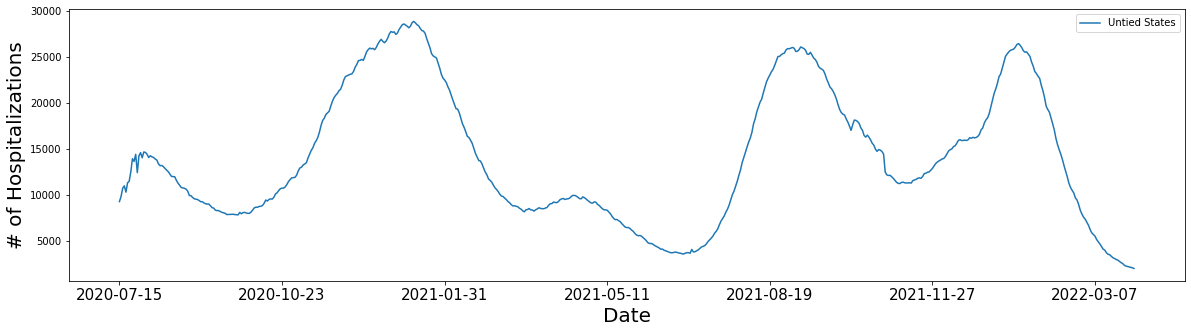

In [9]:
plt.figure(figsize=(20, 5))
plt.ylabel('# of Hospitalizations', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.plot(values, label='Untied States')

plt.xticks(ticks=np.arange(len(values))[::100], labels=dates[::100], fontsize=15)
plt.legend()

plt.show()